In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_csv('data/jp_program.csv', encoding='utf-8')

# 폰트 파라미터 설정
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 깨지는 문제 해결

In [46]:
# Remove unwanted columns
df.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', '종합 순위', '장르별 순위'], inplace=True)

# Convert '방영일' to datetime
df['방영일'] = pd.to_datetime(df['방영일'], format='%Y.%m.%d')

# Assure '시청률' is already transformed correctly; recheck and preprocess other necessary columns
df['방영일'] = pd.to_datetime(df['방영일'])
df['요일'] = df['방영일'].dt.dayofweek  # Monday=0, Sunday=6

# Remove '%' from '시청률' and convert to float
df['시청률'] = df['시청률'].str.rstrip('%').astype(float)

# 방송시간을 분으로 변환
df['방송시간'] = df['방송시간'].str.extract('(\d+):(\d+)').astype(float).apply(lambda x: x[0] * 60 + x[1], axis=1)
df = df[df['방송시간'] <= 200]


<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
/var/folders/40/58yhrb9d7q32wcxf8vbspv8h0000gn/T/ipykernel_60771/2226047798.py:15: SyntaxWarning: invalid escape sequence '\d'
  df['방송시간'] = df['방송시간'].str.extract('(\d+):(\d+)').astype(float).apply(lambda x: x[0] * 60 + x[1], axis=1)


In [14]:
df['시간대'] = pd.to_datetime(df['방송시작시간']).dt.hour // 2 * 2  # 2시간 단위로 구분

/var/folders/40/58yhrb9d7q32wcxf8vbspv8h0000gn/T/ipykernel_60771/1562211035.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['시간대'] = pd.to_datetime(df['방송시작시간']).dt.hour // 2 * 2  # 2시간 단위로 구분


In [15]:
df.head()

,NO,방송사,제목,방영일,요일,회차,시청률,장르,방송시작시간,방송종료시간,방송시간,시간대
0,1,채널A,성적을 부탁해 티처스2,2024-09-01,6,24,1.339,예능,19:50,21:00,70.0,18
1,2,채널A,성적을 부탁해 티처스2,2024-08-25,6,23,1.048,예능,19:50,21:00,70.0,18
2,3,채널A,성적을 부탁해 티처스2,2024-08-18,6,22,0.994,예능,19:50,21:00,70.0,18
3,4,채널A,성적을 부탁해 티처스2,2024-08-11,6,21,1.081,예능,19:50,21:00,70.0,18
4,5,채널A,성적을 부탁해 티처스2,2024-08-04,6,20,1.223,예능,19:50,21:00,70.0,18


In [16]:
# OLS 회귀 모델 적용
model = ols('시청률 ~ 장르 + 요일 + 시간대', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    시청률   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     45.90
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.92e-38
Time:                        11:59:15   Log-Likelihood:                -769.23
No. Observations:                 466   AIC:                             1550.
Df Residuals:                     460   BIC:                             1575.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.5165      1.322     -7.956      0.0

In [17]:
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

              sum_sq     df          F        PR(>F)
장르        158.775263    3.0  32.864207  2.911579e-19
요일          1.523689    1.0   0.946145  3.312136e-01
시간대       134.726264    1.0  83.659226  1.909209e-18
Residual  740.791952  460.0        NaN           NaN


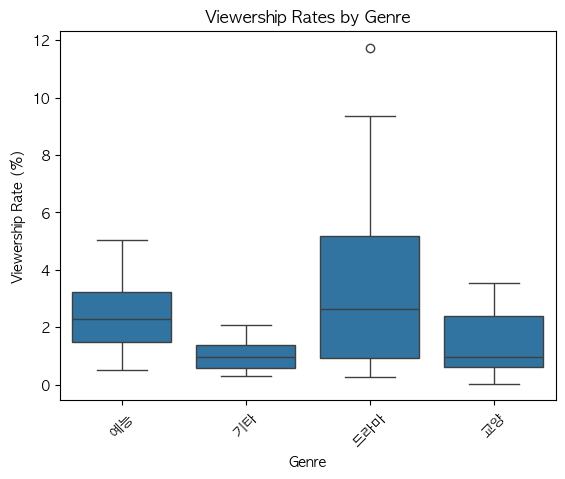

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 장르별 시청률 시각화
sns.boxplot(x='장르', y='시청률', data=df)
plt.title('Viewership Rates by Genre')
plt.xlabel('Genre')
plt.ylabel('Viewership Rate (%)')
plt.xticks(rotation=45)
plt.show()

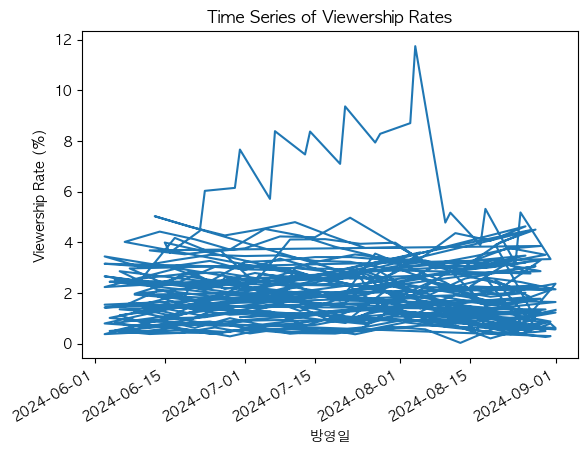

In [19]:
# 날짜를 인덱스로 설정
df['방영일'] = pd.to_datetime(df['방영일'])
df.set_index('방영일', inplace=True)

# 시계열 분석을 위한 시각화
df['시청률'].plot()
plt.title('Time Series of Viewership Rates')
plt.ylabel('Viewership Rate (%)')
plt.show()

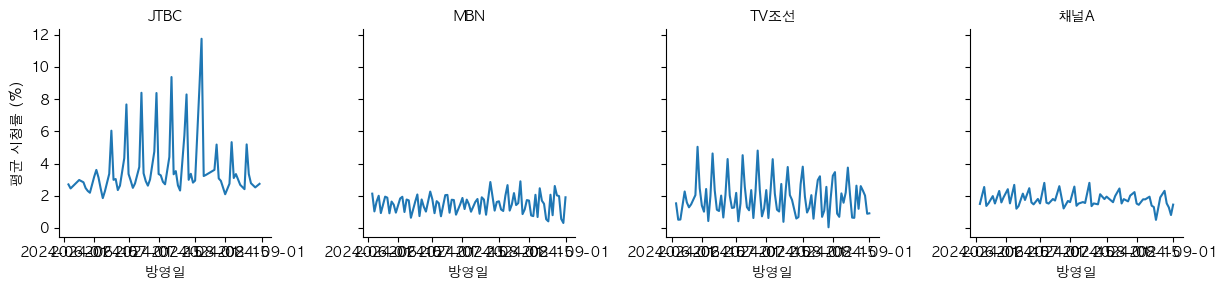

In [23]:
# 데이터 정렬
df.sort_values(by=['방송사', '방영일'], inplace=True)

# 각 방송사별로 시청률의 평균을 계산 (필요에 따라 다른 통계치 사용 가능)
df_grouped = df.groupby(['방송사', '방영일'])['시청률'].mean().reset_index()

# 방송사별로 시청률 시각화
g = sns.FacetGrid(df_grouped, col="방송사", col_wrap=4, height=3)
g.map_dataframe(sns.lineplot, x='방영일', y='시청률')
g.set_axis_labels("방영일", "평균 시청률 (%)")
g.set_titles(col_template="{col_name}")
g.add_legend()

# 그래프 표시
plt.show()

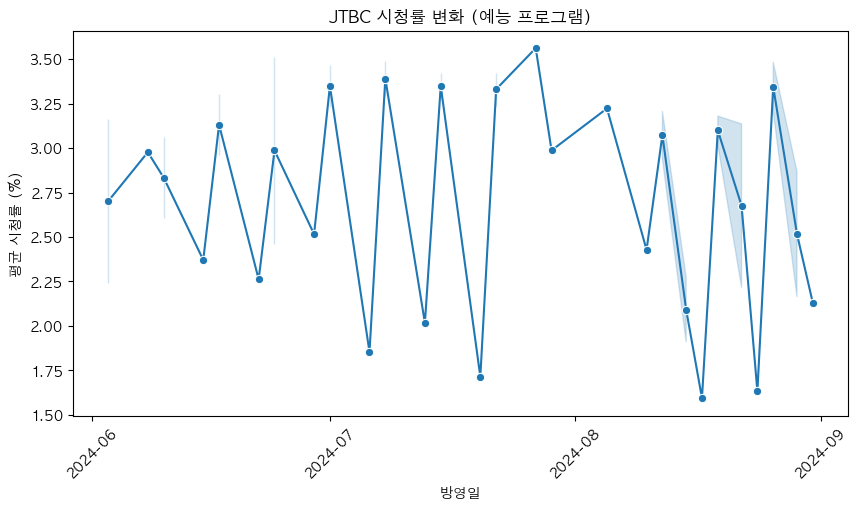

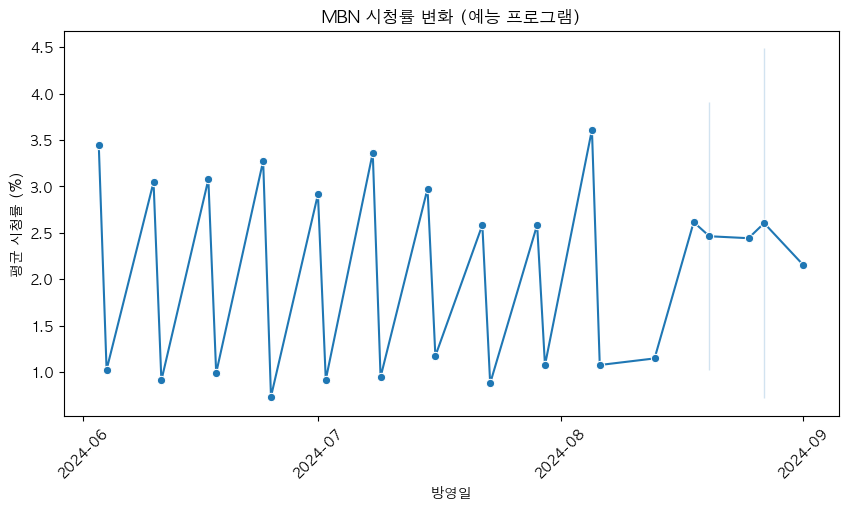

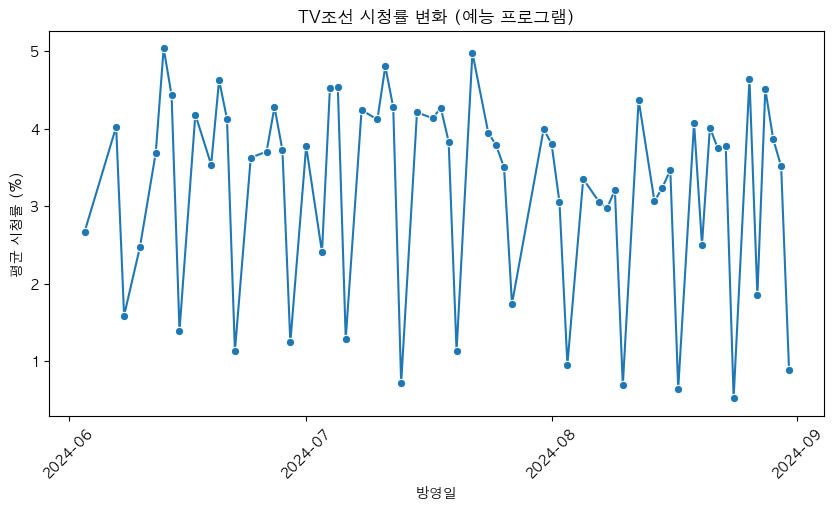

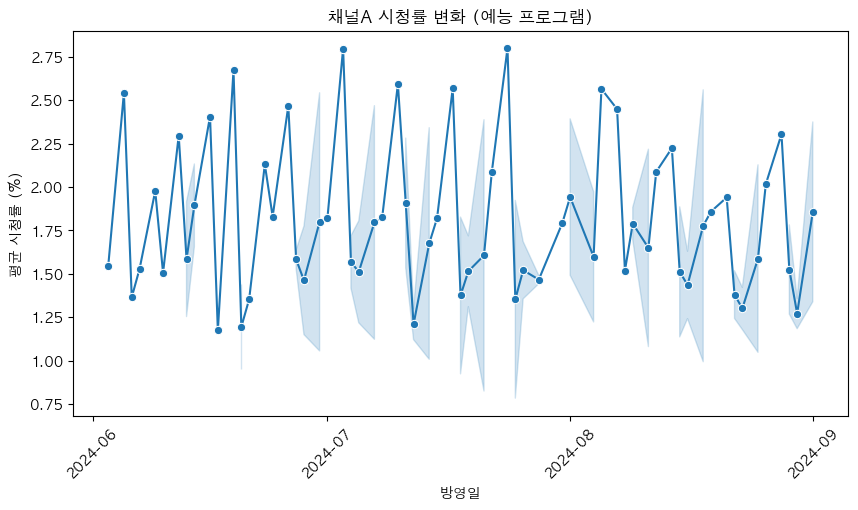

In [29]:
# 예능 프로그램만 필터링
df = df[df['장르'] == '예능']

# 데이터 정렬
df.sort_values(by=['방송사', '방영일'], inplace=True)

# 방송사 리스트
broadcasters = df['방송사'].unique()

# 각 방송사별로 그래프 생성
for broadcaster in broadcasters:
    # 방송사별 데이터 필터링
    data = df[df['방송사'] == broadcaster]
    
    # 그래프 그리기
    plt.figure(figsize=(10, 5))  # 그래프 크기 설정
    sns.lineplot(data=data, x='방영일', y='시청률', marker='o')
    
    # x 축의 포맷 변경
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    
    # 그래프 제목 및 라벨 설정
    plt.title(f'{broadcaster} 시청률 변화 (예능 프로그램)')
    plt.xlabel('방영일')
    plt.ylabel('평균 시청률 (%)')
    
    # 그래프 보여주기
    plt.show()

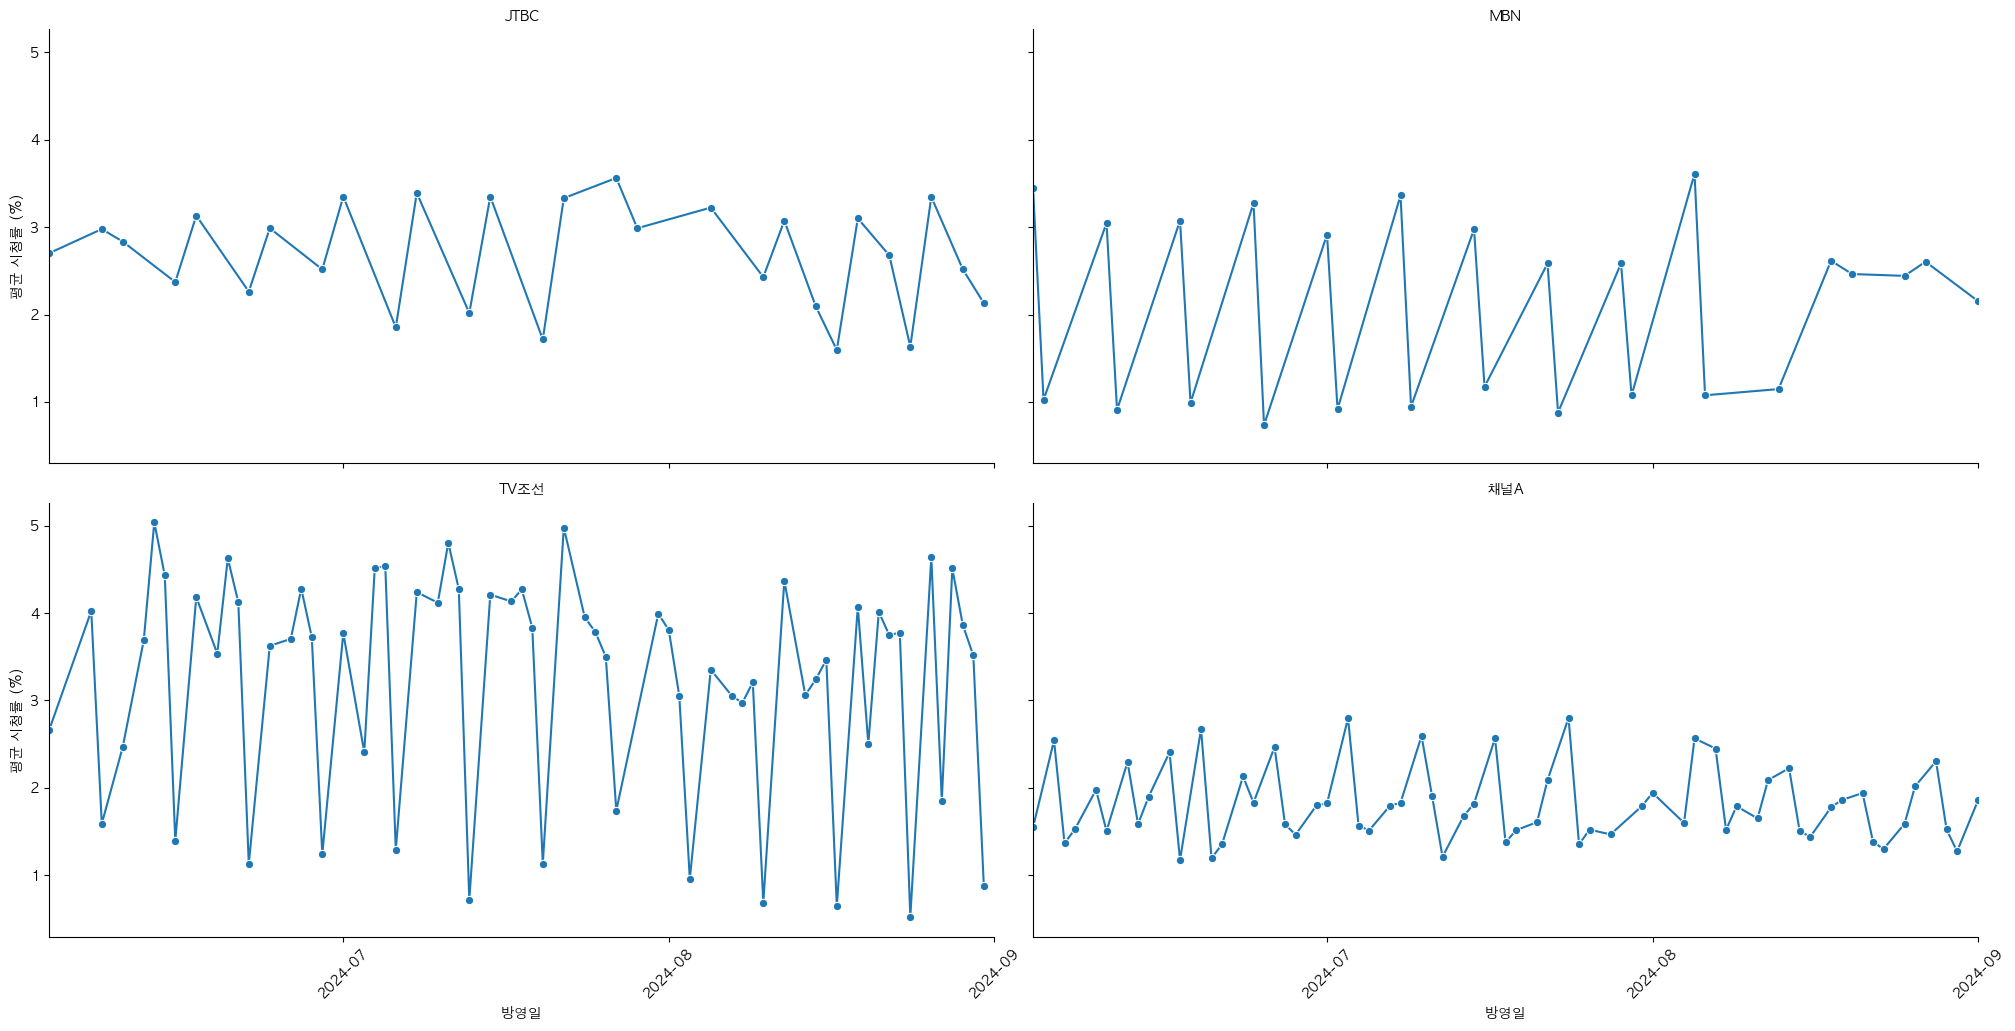

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = df[df['장르'] == '예능']

# 그룹화 및 평균 시청률 계산
df_grouped = df.groupby(['방송사', '방영일'])['시청률'].mean().reset_index()

# 큰 그리드 생성
g = sns.FacetGrid(df_grouped, col="방송사", col_wrap=2, height=5, aspect=2)  # 크기 조정
g.map_dataframe(sns.lineplot, x='방영일', y='시청률', marker='o')

# x 축의 포맷 변경
g.set_axis_labels("방영일", "평균 시청률 (%)")
g.set_titles(col_template="{col_name}")
g.set(xlim=(df_grouped['방영일'].min(), df_grouped['방영일'].max()))

# 각 축에 날짜 포맷 적용
for ax in g.axes.flatten():
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 연-월 표시
    plt.setp(ax.get_xticklabels(), rotation=45)  # 라벨 회전

# 그래프 보여주기
plt.show()

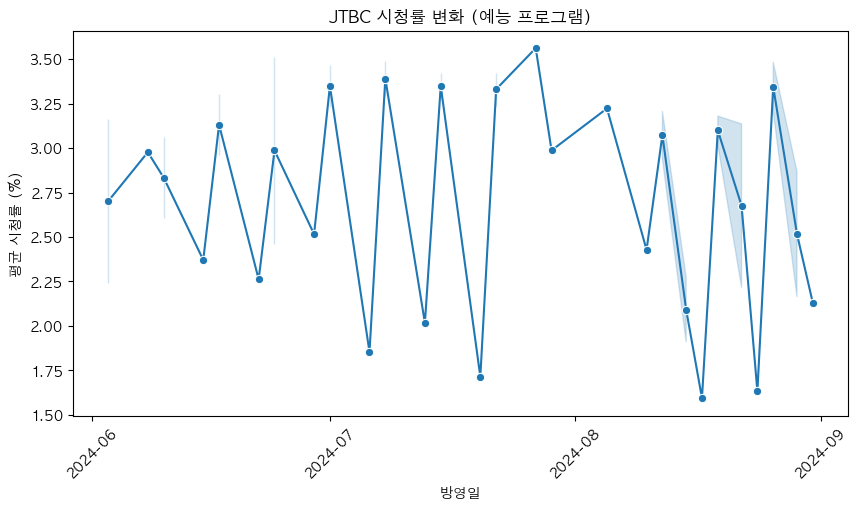

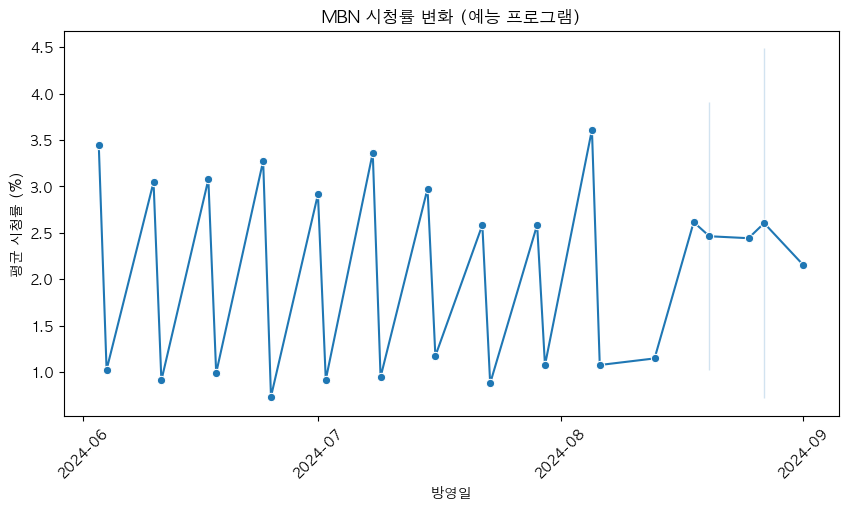

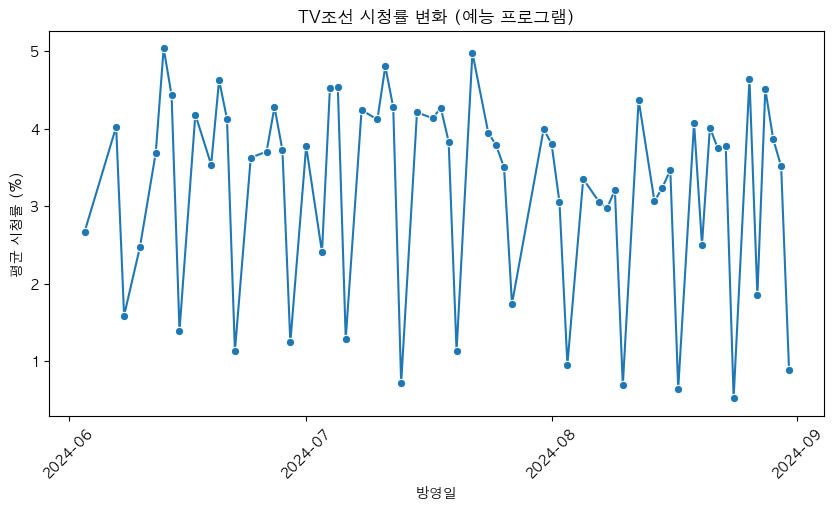

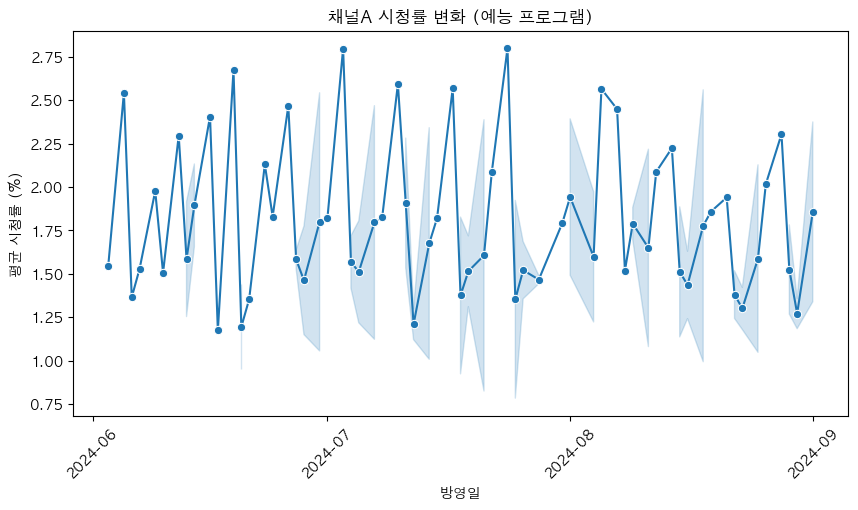

In [30]:
# 예능 프로그램만 필터링
df = df[df['장르'] == '예능']

# 데이터 정렬
df.sort_values(by=['방송사', '방영일'], inplace=True)

# 방송사 리스트
broadcasters = df['방송사'].unique()

# 각 방송사별로 그래프 생성
for broadcaster in broadcasters:
    # 방송사별 데이터 필터링
    data = df[df['방송사'] == broadcaster]
    
    # 그래프 그리기
    plt.figure(figsize=(10, 5))  # 그래프 크기 설정
    sns.lineplot(data=data, x='방영일', y='시청률', marker='o')
    
    # x 축의 포맷 변경
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    
    # 그래프 제목 및 라벨 설정
    plt.title(f'{broadcaster} 시청률 변화 (예능 프로그램)')
    plt.xlabel('방영일')
    plt.ylabel('평균 시청률 (%)')
    
    # 그래프 보여주기
    plt.show()

In [44]:
df.head()

,NO,방송사,제목,요일,회차,시청률,장르,방송시작시간,방송종료시간,방송시간,시간대
방영일,,,,,,,,,,,
2024-06-03,124,JTBC,톡파원 25시,0,115,2.242,예능,20:50,22:10,80.0,20
2024-06-03,137,JTBC,최강야구,0,84,3.162,예능,22:30,0:40,130.0,22
2024-06-08,184,JTBC,아는 형님,5,437,2.977,예능,20:50,22:20,90.0,20
2024-06-10,123,JTBC,톡파원 25시,0,116,2.605,예능,20:50,22:10,80.0,20
2024-06-10,136,JTBC,최강야구,0,85,3.063,예능,22:30,0:40,130.0,22


In [61]:
df_grouped = df.groupby('제목')['방송시작시간'].mean() #.reset_index()

TypeError: agg function failed [how->mean,dtype->object]

In [55]:
df_grouped.head()

,NO,방송사,제목,방영일,요일,회차,시청률,장르,방송시작시간,방송종료시간,방송시간
0,1,채널A,성적을 부탁해 티처스2,2024-09-01,6,24,1.339,예능,19:50,21:00,70.0
1,2,채널A,성적을 부탁해 티처스2,2024-08-25,6,23,1.048,예능,19:50,21:00,70.0
2,3,채널A,성적을 부탁해 티처스2,2024-08-18,6,22,0.994,예능,19:50,21:00,70.0
3,4,채널A,성적을 부탁해 티처스2,2024-08-11,6,21,1.081,예능,19:50,21:00,70.0
4,5,채널A,성적을 부탁해 티처스2,2024-08-04,6,20,1.223,예능,19:50,21:00,70.0
...,...,...,...,...,...,...,...,...,...,...,...
466,467,TV조선,식객 허영만의 백반기행,2024-09-01,6,261,1.236,교양,19:50,20:50,60.0
467,468,TV조선,식객 허영만의 백반기행,2024-08-18,6,260,0.757,교양,19:50,20:50,60.0
468,469,TV조선,식객 허영만의 백반기행,2024-08-11,6,259,1.071,교양,19:50,20:50,60.0
469,470,TV조선,식객 허영만의 백반기행,2024-08-04,6,258,1.250,교양,19:50,20:50,60.0


In [59]:
from datetime import datetime

# '방송시작시간' 컬럼을 datetime.time 형식으로 변환하는 함수
def convert_time(time_str):
    return datetime.strptime(time_str, '%H:%M').time()

# '방송시작시간' 컬럼 변환
df['방송시작시간'] = df['방송시작시간'].apply(convert_time)

# 결과 확인
print(df['방송시작시간'].head())

TypeError: strptime() argument 1 must be str, not datetime.time

In [60]:
print(df['방송시작시간'])

0      19:50:00
1      19:50:00
2      19:50:00
3      19:50:00
4      19:50:00
         ...   
472    19:50:00
473    19:50:00
474    19:50:00
475    19:50:00
476    19:50:00
Name: 방송시작시간, Length: 466, dtype: object


In [62]:
df_grouped = df.groupby('제목')['방송시작시간'].mean() #.reset_index()

TypeError: agg function failed [how->mean,dtype->object]